ANN_1.ipynb
是用前20*2个数据（前20min），预测后一个的数据，因此效果非常的好。

In [4]:
# -*- coding: utf-8 -*-
#coding:unicode_escape
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
plt.rcParams['axes.unicode_minus'] = False#解决负数问题

In [5]:
df = pd.read_csv("C:/Users/24496/Desktop/BigData/wind_raw.csv",encoding='unicode_escape')
df = df[['date','power','day']]
df

,date,power,day
0,2015/10/1 0:00,0.38065,1
1,2015/10/1 0:00,0.36943,1
2,2015/10/1 0:01,0.38529,1
3,2015/10/1 0:01,0.38892,1
4,2015/10/1 0:02,0.41220,1
...,...,...,...
89275,2015/10/31 23:57,0.10177,31
89276,2015/10/31 23:58,0.10354,31
89277,2015/10/31 23:58,0.10008,31
89278,2015/10/31 23:59,0.10516,31


In [11]:
df_only_power = df[['power']]
df_only_power


,power
0,0.38065
1,0.36943
2,0.38529
3,0.38892
4,0.41220
...,...
89275,0.10177
89276,0.10354
89277,0.10008
89278,0.10516


In [12]:
#使用前13天的数据做训练
df_train = df_only_power.iloc[:13*2880]
df_train
# df_train.isnull().values.any()   False

,power
0,0.38065
1,0.36943
2,0.38529
3,0.38892
4,0.41220
...,...
37435,0.19256
37436,0.19485
37437,0.19554
37438,0.19210


In [18]:
def read_data(N):  #N是特征数目，就是用之前多少个power 来预测后一个i   现在这还是预测后一个i！！！

    data = df_train.values
    X = []
    Y = []
    for i in range(N,len(data)):  #
        s=[]
        for j in range(i-N,i):
            s.append(data[j][0])
        X.append(s)
        Y.append(data[i][0])

    return np.array(X),np.array(Y)

Nset = 20*2#用前20min的power预测后一个i

N= Nset  
X,Y = read_data(N)
X


37400

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)


In [26]:
#模型结构，采用relu函数为激活函数，输入层为N个属性
#下面为4层隐含层，每层的神经元个数依次为500，500，250，250
#输入层对应N个属性
model = keras.Sequential([
        keras.layers.Dense(500,activation='relu',input_shape=[N]),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(250,activation='relu'),
        keras.layers.Dense(250,activation='relu'),
        keras.layers.Dense(1)])#最后输出为一个结果，也就是预测的值
#定义损失函数loss，采用的优化器optimizer为Adam
model.compile(loss='mean_absolute_error',optimizer='Adam')
model.fit(x_train,y_train,batch_size = 126,epochs=100)   #训练epochs个批次，每个批次数据量为batch_size

Epoch 1/100
238/238 [==============================] - 2s 6ms/step - loss: 0.0219
Epoch 2/100
238/238 [==============================] - 2s 7ms/step - loss: 0.0141
Epoch 3/100
238/238 [==============================] - 2s 7ms/step - loss: 0.0134
Epoch 4/100
238/238 [==============================] - 2s 7ms/step - loss: 0.0120
Epoch 5/100
238/238 [==============================] - 2s 7ms/step - loss: 0.0131
Epoch 6/100
238/238 [==============================] - 1s 6ms/step - loss: 0.0105
Epoch 7/100
238/238 [==============================] - 2s 7ms/step - loss: 0.0118
Epoch 8/100
238/238 [==============================] - 2s 9ms/step - loss: 0.0106
Epoch 9/100
238/238 [==============================] - 2s 9ms/step - loss: 0.0108
Epoch 10/100
238/238 [==============================] - 2s 8ms/step - loss: 0.0111
Epoch 11/100
238/238 [==============================] - 2s 8ms/step - loss: 0.0103
Epoch 12/100
238/238 [==============================] - 2s 8ms/step - loss: 0.0104
Epoch 13/100


In [30]:
#使用第20天的数据做预测验证
df_test = df.iloc[19*2880:20*2880]
df_test
# df_test.isnull().values.any()

,date,power,day
54720,2015/10/20 0:00,0.25200,20
54721,2015/10/20 0:00,0.26357,20
54722,2015/10/20 0:01,0.26896,20
54723,2015/10/20 0:01,0.26124,20
54724,2015/10/20 0:02,0.25907,20
...,...,...,...
57595,2015/10/20 23:57,0.39467,20
57596,2015/10/20 23:58,0.39337,20
57597,2015/10/20 23:58,0.39272,20
57598,2015/10/20 23:59,0.39813,20


In [31]:
df_test_only_power = df_test[['power']]
df_test_only_power

,power
54720,0.25200
54721,0.26357
54722,0.26896
54723,0.26124
54724,0.25907
...,...
57595,0.39467
57596,0.39337
57597,0.39272
57598,0.39813


In [38]:
def read_data_test(N):  #N是特征数目，就是用之前多少个power 来预测后一个i   现在这还是预测后一个i！！！

    data = df_test_only_power.values
    X = []
    Y = []
    for i in range(N,len(data)):  #
        s=[]
        for j in range(i-N,i):
            s.append(data[j][0])
        X.append(s)
        Y.append(data[i][0])

    return np.array(X),np.array(Y)
Nset = 40
x_test, y_test_true = read_data_test(40)
len(y_test_true)



2840

In [39]:
#输出结果预测
y_test_predict=model.predict(x_test)
print('预测结果为：',y_test_predict)

89/89 [==============================] - 0s 3ms/step
预测结果为： [[0.2135919 ]
 [0.21824095]
 [0.21680728]
 ...
 [0.38621247]
 [0.38445568]
 [0.38850102]]


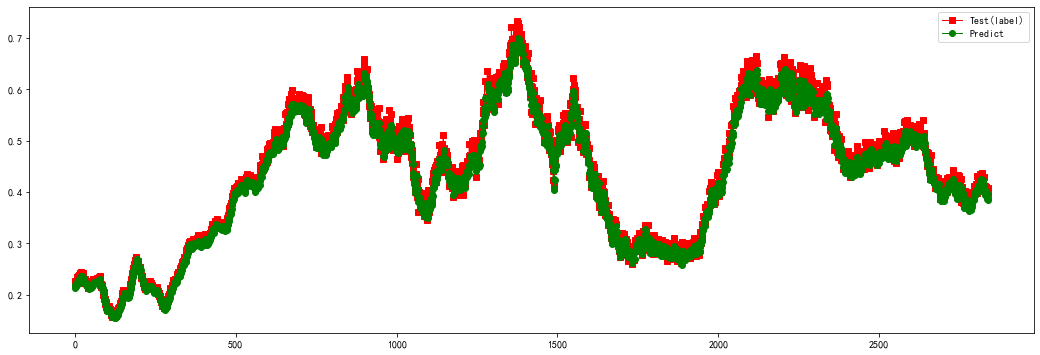

In [40]:

t = np.arange(len(y_test_predict))
plt.figure(figsize=(18,6))
plt.plot(t, y_test_true,"rs-", linewidth=1, label='Test(label)')
plt.plot(t, y_test_predict, 'go-', linewidth=1, label='Predict')
plt.legend()
plt.show()
